# 4장 선형회귀 

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
x = 2*np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

## 정규방정식

#### cost func 를 최소화하는 Theta값 찾기
- 
theta = (XT * X)^-1 * XT * y

In [96]:
x_b = np.c_[np.ones((100,1)),x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # theta = (XT * X)^-1 * XT * y

- inv 는 역행렬 
- dot() 행렬 곱셈
- arr.T 트랜스포즈

In [97]:
theta

array([[4.00967504],
       [3.02909302]])

#### Theta_Hat 을 사용한 예측

In [98]:
x_n = np.array([[0],[2]])
x_n_b = np.c_[np.ones((2,1)),x_n]

y_pre = x_n_b.dot(theta)
y_pre

array([[ 4.00967504],
       [10.06786108]])

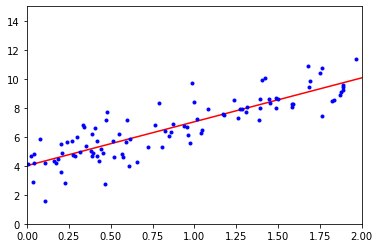

In [99]:
plt.plot(x_n, y_pre,'r')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lin_reg.intercept_

array([4.00967504])

In [102]:
lin_reg.coef_

array([[3.02909302]])

In [103]:
lin_reg.predict(x_n)

array([[ 4.00967504],
       [10.06786108]])

#### LinearRegression Class 는 scipy.linalg.lstsq() 함수 (최소제곱)을 기반으로 한다.
- 직접 이 함수를 호출하자

In [104]:
theta_svd, residuals, rank , s = np.linalg.lstsq(x_b, y , rcond = 1e-6)
theta_svd

array([[4.00967504],
       [3.02909302]])

무어-펜로즈 유사 역행렬을 통해 Theta_h = X^+ * y계산 

In [105]:
np.linalg.pinv(x_b).dot(y)

array([[4.00967504],
       [3.02909302]])

In [106]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [107]:
theta

array([[4.00967504],
       [3.02909302]])

In [108]:
n_epochs = 67
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+ t1)


theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients

In [109]:
theta

array([[3.9854111 ],
       [2.99795844]])

In [110]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3, penalty = None , eta0= 0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [111]:
sgd_reg.intercept_

array([3.99848548])

In [112]:
sgd_reg.coef_

array([3.02292712])

### 다항회귀일 때 선형 모델 훈련

In [113]:
m = 100 
x = 6 * np.random.randn(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

[-3, 3, 0, 10]

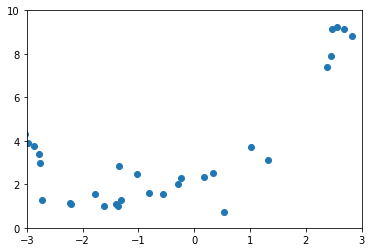

In [114]:
plt.scatter(x,y)
plt.axis([-3,3,0,10])

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)

In [116]:
x[0]

array([-1.34013645])

In [117]:
x_poly[0]

array([-1.34013645,  1.79596571])

In [118]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
lin_reg.intercept_ #상수항

array([2.1590083])

In [122]:
lin_reg.coef_ # 1차, 2차

array([[1.00425836, 0.49782143]])

원래 함수
- y = 0.5 * x1^2 + 1.0 * x1 + 2.0 +가우시안잡음  
  
예측된 모델  
- y^ = 0.4978 x1^2 + 1.00x1 + 2.16